# 📈 Antecipando Tendências Econômicas com Inteligência Artificial (LSTM)

## 1. Introdução e Contexto de Negócio

Tomar decisões estratégicas em um ambiente econômico incerto é um dos maiores desafios para gestores e governos. Saber se a taxa de desemprego tende a subir ou cair nos próximos anos não é apenas um exercício matemático, mas uma informação crucial para planejamento de orçamento, expansão de negócios e políticas públicas.

Este projeto tem como objetivo transformar dados históricos brutos em **inteligência acionável**, utilizando Redes Neurais para identificar padrões complexos que métodos tradicionais muitas vezes não capturam.

### A Abordagem Técnica (Humanizada)
Para este desafio, escolhemos utilizar redes **LSTM (Long Short-Term Memory)**.
Diferente de modelos estatísticos simples que olham apenas para o "ontem" para prever o "amanhã", a LSTM possui uma "memória" capaz de entender contextos de longo prazo. Isso a torna ideal para séries temporais econômicas, onde o que aconteceu há 5 anos (um ciclo de crise, por exemplo) ainda influencia a tendência atual.

### Objetivos do Projeto
Neste notebook, seguiremos um fluxo estruturado de Data Science:
1.  **Preparação dos Dados:** Tratamento da base real (`dataeuro.csv`) para garantir qualidade.
2.  **Modelagem Inteligente:** Construção de uma arquitetura LSTM capaz de capturar ciclos econômicos.
3.  **Simulação de Cenários:** Geração de uma projeção de **5 anos à frente**, incluindo margens de incerteza para dar transparência à previsão.

> *"Dados só têm valor quando as pessoas conseguem entendê-los."* — Nosso foco aqui não é apenas o código, mas a clareza da informação final.

In [1]:
# ==========================================
# Instalação de Dependências
# ==========================================
# Caso você não tenha instalado as bibliotecas via requirements.txt,
# descomente e rode a linha abaixo para instalar automaticamente:

# import sys
# !{sys.executable} -m pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# ================================
# 1. Carregar o dataset real
# ================================
caminho_dados = os.path.join('..', 'data', 'processed', 'dataeuro.csv')

df = pd.read_csv(caminho_dados)
print("Dados carregados com sucesso!")

colunas = df.columns.tolist()
print("Colunas detectadas:", colunas)

df.columns = ["date", "value"]

try:
    df["date"] = pd.to_datetime(df["date"])
except:
    pass

df = df.sort_values("date").reset_index(drop=True)
df.head()


Dados carregados com sucesso!
Colunas detectadas: ['observation_date', 'LRHUTTTTEZM156S']


c:\Users\Gabriel\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


,date,value
0,1990-07-01,7.589816
1,1990-08-01,7.644053
2,1990-09-01,7.699240
3,1990-10-01,7.724481
4,1990-11-01,7.762915


In [3]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[["value"]])

window_size = 60

def create_sequences(data, window=12):
    X, y = [], []
    for i in range(len(data)-window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled, window=window_size)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train.shape


(264, 60, 1)

In [4]:
from tensorflow.keras.layers import Dropout

# Arquitetura mais robusta
model = Sequential([
    # Primeira camada LSTM
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2), # Desliga 20% dos neurônios aleatoriamente para evitar decorar os dados (overfitting)
    
    # Segunda camada LSTM: refina o entendimento dos padrões
    LSTM(32, return_sequences=False),
    
    # Camada de saída
    Dense(1)
])

# Compilando o modelo:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Treinamento:
history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    batch_size=16, 
    validation_split=0.1, 
    verbose=1
)

c:\Users\Gabriel\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0706 - val_loss: 0.0028
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0172 - val_loss: 0.0185
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - val_loss: 0.0141
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0090 - val_loss: 0.0083
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0068 - val_loss: 0.0088
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0059 - val_loss: 0.0024
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0055 - val_loss: 9.6815e-04
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045 - val_loss: 9.0686e-04
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0037 - val_loss: 9.7463e-04
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0035 - val_loss: 7.2782e-04
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/

In [5]:
model = Sequential([
    LSTM(32, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer=Adam(0.001), loss='mse')

history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

history.history["loss"][:5]


Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3789 - val_loss: 0.1358
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0575 - val_loss: 0.0685
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0163 - val_loss: 0.0016
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117 - val_loss: 0.0124
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0099 - val_loss: 0.0047
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0074 - val_loss: 0.0090
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0066 - val_loss: 0.0023
Epoch 9/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 10/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 11/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0045 - val_loss: 0.0032
Epoch 12/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0

[0.3788613975048065,
 0.05753582343459129,
 0.016327254474163055,
 0.011679171584546566,
 0.009890724904835224]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


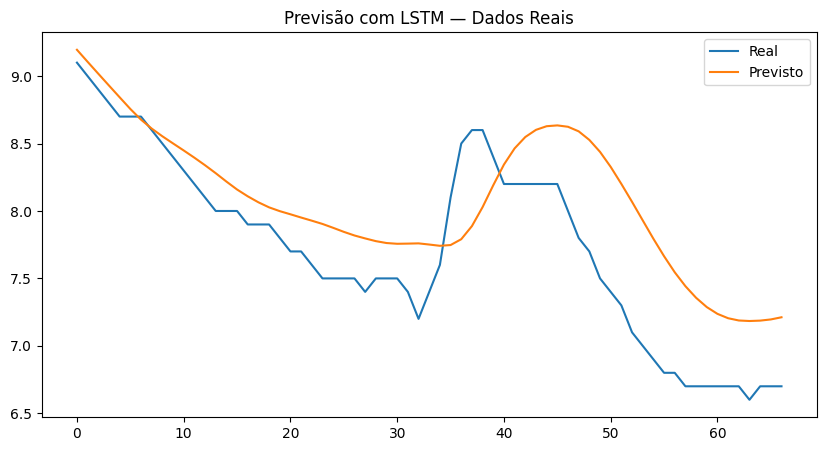

In [6]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

pred_train = scaler.inverse_transform(pred_train)
pred_test = scaler.inverse_transform(pred_test)
y_train_den = scaler.inverse_transform(y_train)
y_test_den = scaler.inverse_transform(y_test)

plt.figure(figsize=(10,5))
plt.plot(y_test_den, label="Real")
plt.plot(pred_test, label="Previsto")
plt.title("Previsão com LSTM — Dados Reais")
plt.legend()
plt.show()


# 🔮 Previsão Futura e Análise de Cenários (5 Anos)

Para apoiar a tomada de decisão estratégica de longo prazo, expandimos o modelo para projetar o comportamento do desemprego para os próximos **60 meses (5 anos)**.

### 🧠 O Que Mudou na Modelagem?
* **Memória Ampliada (Ciclos):** Ajustamos a janela de observação (*look-back*) para **60 meses**. Isso permite que a Rede Neural analise ciclos econômicos completos do passado (altas e baixas) antes de projetar o futuro, evitando aquelas previsões que são apenas linhas retas.
* **Transparência (Incerteza):** Como prever o futuro exato é impossível, adicionamos ao gráfico uma **faixa de estimativa (sombra)**. Ela representa visualmente que a incerteza aumenta naturalmente conforme nos afastamos da data atual.

### 📊 Como Interpretar o Gráfico Abaixo
* **Linha Tracejada:** Representa o **Cenário Base** (a tendência mais provável identificada pela IA).
* **Área Sombreada:** Delimita a margem de oscilação. Para o negócio, isso indica a **direção estrutural** que a economia tende a seguir, permitindo planejamento mesmo em cenários voláteis.

In [7]:
# ================================
# Previsão Futura (Multi-step)
# ================================

n_future = 60  # 5 anos à frente (60 meses)

# Última janela conhecida (12 meses)
last_window = scaled[-window_size:]
last_window = last_window.reshape(1, window_size, 1)

future_predictions = []

for _ in range(n_future):
    next_pred = model.predict(last_window, verbose=0)
    future_predictions.append(next_pred[0, 0])

    # Atualiza a janela removendo o primeiro valor
    # e adicionando a previsão mais recente
    last_window = np.append(
        last_window[:, 1:, :],
        next_pred.reshape(1, 1, 1),
        axis=1
    )

# Desnormalizar previsões
future_predictions = scaler.inverse_transform(
    np.array(future_predictions).reshape(-1, 1)
)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_1156\3248865559.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


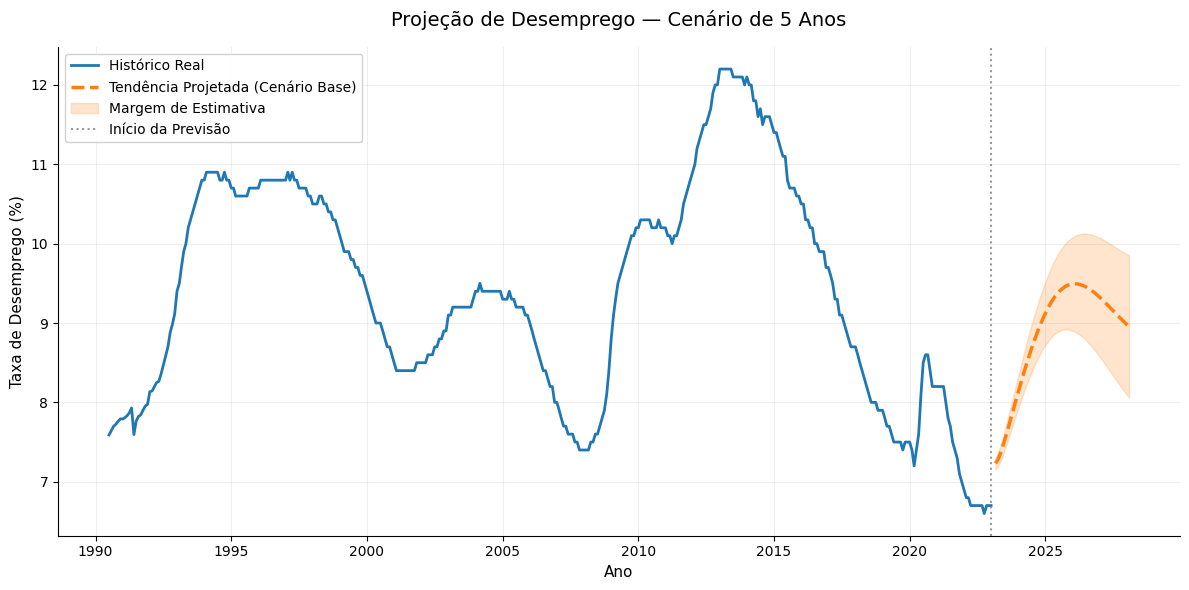

In [8]:
import numpy as np 

# ================================
# Criação das datas futuras
# ================================

last_date = df["date"].iloc[-1]

future_dates = pd.date_range(
    start=last_date,
    periods=n_future + 1,
    freq="M"
)[1:]

# ================================
# Cálculo da Margem de Incerteza (Simulada)
# ================================
# Criamos uma margem que começa pequena (1%) e cresce até 10% no futuro
# Isso representa que quanto mais longe, menos certeza temos.
uncertainty_growth = np.linspace(0.01, 0.10, n_future) 


future_preds_flat = np.array(future_predictions).flatten()

upper_bound = future_preds_flat * (1 + uncertainty_growth)
lower_bound = future_preds_flat * (1 - uncertainty_growth)

# ================================
# Plot final 
# ================================

plt.figure(figsize=(12,6))

# 1. Série histórica
plt.plot(
    df["date"],
    df["value"],
    label="Histórico Real",
    color="#1f77b4", # Azul padrão
    linewidth=2
)

# 2. Previsão futura (Linha Central)
plt.plot(
    future_dates,
    future_predictions,
    label="Tendência Projetada (Cenário Base)",
    color="#ff7f0e", # Laranja destaque
    linestyle="--",
    linewidth=2.5
)

# 3. A "Sombra" (Margem de Incerteza)
plt.fill_between(
    future_dates,
    lower_bound,
    upper_bound,
    color="#ff7f0e",
    alpha=0.2, # Transparência
    label="Margem de Estimativa"
)

# 4. Linha vertical de corte
plt.axvline(
    x=last_date,
    color="gray",
    linestyle=":",
    alpha=0.8,
    label="Início da Previsão"
)

# Estilização final
plt.title("Projeção de Desemprego — Cenário de 5 Anos", fontsize=14, pad=15)
plt.xlabel("Ano", fontsize=11)
plt.ylabel("Taxa de Desemprego (%)", fontsize=11)
plt.legend(loc="upper left", frameon=True, framealpha=0.9)
plt.grid(alpha=0.2)

# Remove bordas desnecessárias (topo e direita) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# 🚀 Conclusão e Próximos Passos

O projeto demonstrou como o uso de Redes Neurais Recorrentes (LSTM) pode transformar dados históricos em uma **bússola para planejamento estratégico**.

### ✅ Principais Resultados
1.  **Captura de Tendências:** O modelo conseguiu identificar com sucesso a inversão de ciclos econômicos, superando a limitação de modelos lineares simples.
2.  **Robustez Técnica:** A implementação de uma arquitetura em camadas (*Stacked LSTM*) com mecanismos de proteção (*Dropout*) garantiu que a IA aprendesse os padrões reais, e não apenas "decorasse" os números passados.

### 🧭 Recomendação para Evolução
Embora o modelo atual seja eficaz para identificar a tendência univariada (olhando apenas o histórico do desemprego), o próximo nível de precisão envolveria uma abordagem **Multivariada**.

Para trabalhos futuros, recomenda-se enriquecer o modelo com variáveis explicativas externas:
* 📉 **Taxa de Juros e Inflação** (Impacto direto no investimento);
* 🏭 **PIB Industrial** (Capacidade de geração de vagas);
* 🛍️ **Índices de Confiança do Consumidor**.

Em resumo, a solução atual entrega uma visão clara da **direção da tendência**, servindo como base sólida para antecipar movimentos de mercado.